In [2]:
# path = "drive/MyDrive/CS626/"
path = ""

In [2]:
# !pip3 install torch==1.12
# !pip3 install torch==1.8.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from sklearn import metrics
import transformers
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig

In [152]:
data = pd.read_csv(path+"wiki_movie_plots_deduped.csv")

In [153]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [154]:
all_genres = list(set(data["Genre"]))

In [158]:
all_genres

['war propaganda',
 'world war ii/pow',
 'comedy, anthology',
 'fantasy, drama, romance, slice of life',
 'comedy, drama, romance, musical',
 'romantic thriller ',
 'action / comedy / thriller',
 'mockumentary',
 'adult/romance/comedy',
 'drama documentary',
 'costume comedy',
 'martial arts/action/thriller',
 'thriller',
 'biopic of pioneering american photographer eadweard muybridge',
 'drama / action / martial arts / costume',
 'action, musical, drama, comedy',
 "drama, adventure, children's",
 'punk/avant-garde',
 'drama, suspense thriller',
 'action, sci-fi',
 'psychological horror',
 'action / kung fu / comedy',
 'yash raj films',
 'school, sports',
 'political, drama, comedy, romantic comedy',
 'fantasy, anime',
 'family, crime, drama, romance',
 'biopic / drama',
 'drama, action, supernatural, sci-fi, spy',
 'adventure / drama / western',
 'historical fantasy',
 'biography / drama / romance',
 'action, drama, fantasy, romance',
 'action, comedy, drama, romance',
 'devotional bi

In [157]:
len(all_genres)

2265

In [155]:
frequency_dist = dict(data["Genre"].value_counts())

In [156]:
frequency_dist

{'unknown': 6083,
 'drama': 5964,
 'comedy': 4379,
 'horror': 1167,
 'action': 1098,
 'thriller': 966,
 'romance': 923,
 'western': 865,
 'crime': 568,
 'adventure': 526,
 'musical': 467,
 'crime drama': 464,
 'romantic comedy': 461,
 'science fiction': 418,
 'film noir': 345,
 'mystery': 310,
 'war': 273,
 'animation': 264,
 'comedy, drama': 236,
 'sci-fi': 221,
 'family': 217,
 'fantasy': 204,
 'animated': 195,
 'musical comedy': 154,
 'comedy-drama': 137,
 'biography': 136,
 'anime': 112,
 'suspense': 104,
 'comedy drama': 103,
 'romantic drama': 103,
 'animated short': 91,
 'drama, romance': 86,
 'social': 82,
 'historical': 77,
 'action thriller': 73,
 'documentary': 73,
 'serial': 71,
 'world war ii': 70,
 'family drama': 66,
 'war drama': 65,
 'drama, crime': 64,
 'comedy, musical': 63,
 'comedy/drama': 62,
 'comedy, romance': 60,
 'romance, drama': 58,
 'biopic': 57,
 'crime thriller': 56,
 'historical drama': 54,
 'black comedy': 52,
 'action comedy': 51,
 'comedy short': 50,


In [42]:
frequent_genres = []
for i in frequency_dist.keys():

  if "," in i:
    frequent_genres.append(i.split(","))
  
  elif "/" in i:
    frequent_genres.append(i.split("/"))

  elif " " in i and "sci fi" not in i:
    frequent_genres.append(i.split(" "))

  else:
    frequent_genres.append([i])


  # if frequency_dist[i]>=50:
  #   frequent_genres.append(i) 

In [44]:
all_genres = []
for i in frequent_genres:
  all_genres+=i

In [52]:
all_genres = list(set(all_genres))[1:]

In [55]:
space_removed = []
for i in all_genres:

  if i[-1] == " " or i[0]== " ":
    space_removed.append(i.strip())

  else :
    space_removed.append(i)

In [60]:
final_genres = list(set(space_removed))

In [67]:
final_genres.count("unknown")

1

In [81]:
genres_dist = dict.fromkeys(final_genres, 0)

In [85]:
from tqdm import tqdm

In [97]:
one_hot_encoding = pd.DataFrame(columns = final_genres )

for i in tqdm(range(len(data))):
  current_vector = []
  for j in final_genres:
    if j in data["Genre"].iloc[i]:
      current_vector.append(1)
    
    else :
      current_vector.append(0)

  one_hot_encoding.loc[len(one_hot_encoding.index)] = current_vector ]



100%|██████████| 34886/34886 [1:05:11<00:00,  8.92it/s]


In [99]:
# one_hot_encoding.to_csv(path+"one_hot_encoding.csv", index = False)

In [108]:
lower_frequency_genre = []
for i in one_hot_encoding.columns :
   if sum(one_hot_encoding[i]) < 100:
     lower_frequency_genre.append(i)

In [111]:
len(lower_frequency_genre)

700

In [112]:
len(one_hot_encoding.columns)

761

In [74]:
one_hot_encoding = pd.read_csv(path+"one_hot_encoding.csv").drop(["Total Count"], axis=1)

In [75]:
one_hot_encoding

,dramedy,biblical,miniseries,eiga,bhoomika chawla,sports (volleyball),environmental film,samurai,human rights,radhika joshi,...,ballard,exploitation,noir,in,concert film,psycho,rom,bicycle,genelia d'souza,(film
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# one_hot_encoding.drop(lower_frequency_genre, axis = 1).columns

In [7]:
sum(one_hot_encoding["unknown"])

6083

In [12]:
# valid_genres = ['short', 'art', 'science fiction', 'romantic comedy',
#        'martial arts', 'fiction', 'anime', 'horror', 'music', 'romance',
#        'western', 'martial', 'spy', 'animated', 'suspense', 'crime drama',
#        'film', 'roman', 'dram', 'musical', 'world', 'comedy-drama',
#        'historical', 'unknown', 'comedy', 'super', 'war', 'mystery', 'social',
#        'action', 'family', 'science', 'animation', 'film noir', 'biography',
#        'thriller', 'sport', 'world war i', 'drama', 'com',
#        'romantic drama', 'romantic', 'sci-fi', 'arts', 'crime',  
#        'famil', 'adventure', 'fantasy', 'martial art', 'sports', 'historic',
#        'rom']

In [127]:
# valid_genres.sort()

In [3]:
cleaned_ohe = pd.DataFrame()

cleaned_ohe["Plot"] = data["Plot"] 




# x = one_hot_encoding['animated'] + one_hot_encoding['animation'] + one_hot_encoding['anime']>=1
# cleaned_ohe["animated"]  = x.astype(int)




# x = one_hot_encoding['art'] + one_hot_encoding['arts']>=1
# cleaned_ohe["arts"] =  x.astype(int)


x = one_hot_encoding['comedy'] + one_hot_encoding['comedy-drama']>=1
cleaned_ohe["comedy"] =  x.astype(int)


x = one_hot_encoding['crime'] + one_hot_encoding['crime drama']>=1
cleaned_ohe["crime"] =  x.astype(int)

 
# x = one_hot_encoding['sci-fi']+ one_hot_encoding['science'] + one_hot_encoding['science fiction']>=1
# cleaned_ohe["sci_fi"] =  x.astype(int)




x = one_hot_encoding['dram'] + one_hot_encoding['drama'] >=1
cleaned_ohe["drama"] =  x.astype(int)


x = one_hot_encoding['romantic drama'] + one_hot_encoding['romance'] + one_hot_encoding['romantic'] + one_hot_encoding['rom'] + one_hot_encoding['romantic comedy']>=1
cleaned_ohe["romantic"] =  x.astype(int)

# x = one_hot_encoding['music'] + one_hot_encoding['musical']>=1
# cleaned_ohe["music"] =  x.astype(int)




cleaned_ohe["action"] = one_hot_encoding["action"]
cleaned_ohe["horror"] = one_hot_encoding["horror"]
# cleaned_ohe["unknown"] = one_hot_encoding["unknown"]
cleaned_ohe["thriller"] = one_hot_encoding["thriller"]
# cleaned_ohe["suspense"] = one_hot_encoding["suspense"]

# cleaned_ohe["fantasy"] = one_hot_encoding["fantasy"]
# cleaned_ohe["fiction"] = one_hot_encoding["fiction"]
# cleaned_ohe["mystery"] = one_hot_encoding["mystery"]



In [126]:
# x = one_hot_encoding['romantic drama'] + one_hot_encoding['dram'] + one_hot_encoding['drama']>=1
# x.astype(int)

In [133]:
# max(cleaned_ohe["romantic"])

In [135]:
# cleaned_ohe

In [77]:
# Removing cells with all zeros
cleaned_ohe = cleaned_ohe[np.sum(cleaned_ohe[cleaned_ohe.columns[1:]], axis=1)!=0]

In [78]:
cleaned_ohe.to_csv("Cleaned_data.csv", index = False)

In [19]:
# cleaned_ohe = cleaned_ohe[cleaned_ohe.columns[1:]].astype(bool).astype( 'int32')

In [20]:
# cleaned_ohe["Plot"] = data["Plot"] 

## Cleaned Data

In [3]:
cleaned_ohe = pd.read_csv("Cleaned_data.csv")

In [4]:
cleaned_ohe

,Plot,comedy,crime,drama,romantic,action,horror,thriller
0,The film is about a family who move to the sub...,1,0,0,0,0,0,0
1,The film features a train traveling through th...,0,1,0,0,1,0,0
2,Before heading out to a baseball game at a nea...,1,0,0,0,0,0,0
3,The plot is that of a black woman going to the...,1,0,0,0,0,0,0
4,On a beautiful summer day a father and mother ...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
22164,"Zeynep lost her job at weaving factory, and he...",0,0,1,0,0,0,0
22165,"Two musicians, Salih and Gürkan, described the...",1,0,0,0,0,0,0
22166,"Zafer, a sailor living with his mother Döndü i...",1,0,0,0,0,0,0
22167,The film centres around a young woman named Am...,1,0,0,1,0,0,0


In [80]:
total_count = []
for i in cleaned_ohe.columns[1:]:
  total_count.append(sum(cleaned_ohe[i]))

Text(0, 0.5, 'Count')

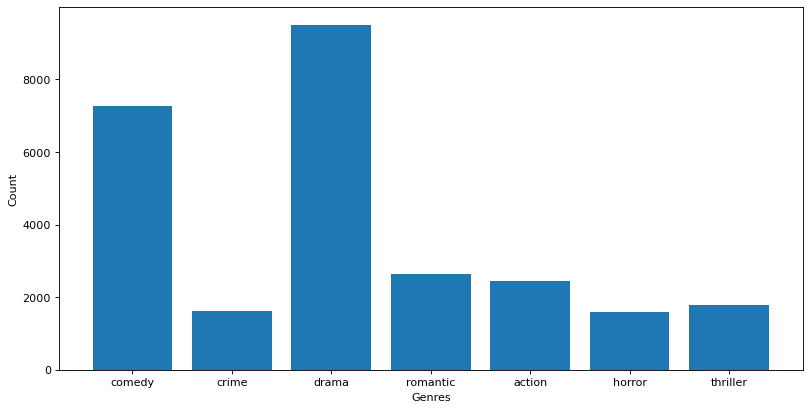

In [81]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
plt.bar(cleaned_ohe.columns[1:],  total_count)
plt.xlabel("Genres")

plt.ylabel("Count")

In [6]:
all_genres = cleaned_ohe.columns[1:]

In [7]:
total_classes = len(cleaned_ohe.columns[1:])

In [15]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [5]:
MAX_LEN = 200
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 8
LEARNING_RATE = 1e-05

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.Plot = dataframe.Plot
        self.targets = self.data.List
        self.max_len = max_len

    def __len__(self):
        return len(self.Plot)

    def __getitem__(self, index):
        Plot = str(self.Plot[index])
        Plot = " ".join(Plot.split())

        inputs = self.tokenizer.encode_plus(
            Plot,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [8]:
df = cleaned_ohe
df['List'] = df[df.columns[1:]].values.tolist()
new_df = df[['Plot', 'List']].copy()
len(new_df)

22169

In [9]:
train_size = 0.8
train_dataset=new_df.sample(frac=train_size,random_state=200)
test_dataset=new_df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)

FULL Dataset: (22169, 2)
TRAIN Dataset: (17735, 2)
TEST Dataset: (4434, 2)


In [10]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [11]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased', force_download=True)
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 7)
    
    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids,  return_dict=False)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

# model = BERTClass()
# model.to(device)

In [12]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [16]:
# optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [20]:
# del data

### Training

In [13]:
def train(epoch):
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%500==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
 
    
    print("-----------------------------------------------------------")
    
 

In [17]:
torch.cuda.empty_cache()

In [23]:
for epoch in range(EPOCHS):
    train(epoch)
    
#     if acc > 0.8:
#         break

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 0, Loss:  0.6472052931785583
Epoch: 0, Loss:  0.3886372148990631
Epoch: 0, Loss:  0.23527595400810242
Epoch: 0, Loss:  0.29779157042503357
Epoch: 0, Loss:  0.2600509524345398
-----------------------------------------------------------
Epoch: 1, Loss:  0.34798985719680786
Epoch: 1, Loss:  0.2284407764673233
Epoch: 1, Loss:  0.30763790011405945
Epoch: 1, Loss:  0.28318485617637634
Epoch: 1, Loss:  0.3504381477832794
-----------------------------------------------------------
Epoch: 2, Loss:  0.26331233978271484
Epoch: 2, Loss:  0.24442961812019348
Epoch: 2, Loss:  0.18222860991954803
Epoch: 2, Loss:  0.2642853260040283
Epoch: 2, Loss:  0.18336476385593414
-----------------------------------------------------------
Epoch: 3, Loss:  0.07821734249591827
Epoch: 3, Loss:  0.27606913447380066
Epoch: 3, Loss:  0.09066105633974075
Epoch: 3, Loss:  0.06630827486515045
Epoch: 3, Loss:  0.20625516772270203
-----------------------------------------------------------
Epoch: 4, Loss:  0.0902053

In [17]:
def validation(epoch):
    
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    
    
    return fin_outputs, fin_targets

In [21]:

    
outputs, targets = validation(1)


outputs = np.array(outputs) >= 0.5

f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


F1 Score (Micro) = 0.6095362022492797
F1 Score (Macro) = 0.54745177233944


In [23]:
total_hamming_distance = 0

for i in range(len(targets)):
    total_hamming_distance += sum(~(targets[i]== outputs[i]))

In [24]:
average_hamming_distance = total_hamming_distance/(len(targets)*7)
average_hamming_distance

0.13535021586442425

In [28]:
recall = metrics.recall_score(targets, outputs, average='micro')
recall

0.6084616812024495

In [29]:
precision = metrics.precision_score(targets, outputs, average='micro')
precision

0.6106145251396649

In [20]:
PATH = "saved_model_7.model"

In [31]:
# torch.save(model.state_dict(), PATH)

In [45]:
from sklearn.metrics import multilabel_confusion_matrix

In [50]:
import seaborn as sns

----------------


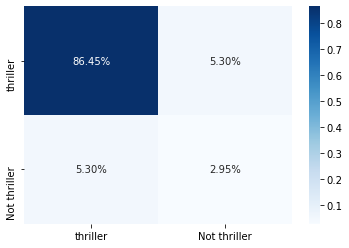

In [61]:
for i in range(6, len(all_genres)):
#     print(all_genres[i], "\n")
    
    cf_matrix = multilabel_confusion_matrix(targets, outputs)[i]

    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
                fmt='.2%', cmap='Blues',  xticklabels=[all_genres[i], "Not "+all_genres[i] ], yticklabels=[all_genres[i], "Not "+all_genres[i]])
    
    print("----------------")
    break
    

### Results

In [42]:
all_accuracy = []
all_precision = []
all_recall = []
all_f1 = []

for i in range(len(all_genres)):
    print(all_genres[i], "\n")
    
    predicted = list(zip(*outputs))[i]
    true_values = list(zip(*targets))[i]
    
    accuracy = metrics.accuracy_score(true_values, predicted)
    print("Accuracy :", accuracy)
    
    precision = metrics.precision_score(true_values, predicted, average='macro')
    print("Precision :", precision)

    recall = metrics.recall_score(true_values, predicted,  average='macro')
    print("Recall :", recall)
    
    f1 = metrics.f1_score(true_values, predicted, average='macro')
    print("F1 :", f1)
    
    all_accuracy.append(accuracy)
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)
    
    print("\n------------------------------------------\n")

comdey 

Accuracy : 0.8051420838971584
Precision : 0.7856448727566507
Recall : 0.7573130348335029
F1 : 0.7680063560964268

------------------------------------------

crime 

Accuracy : 0.9163283716734326
Precision : 0.6961431017392088
Recall : 0.6923226170814517
F1 : 0.6942077492115926

------------------------------------------

drama 

Accuracy : 0.6921515561569689
Precision : 0.6949409152031294
Recall : 0.6982495853435924
F1 : 0.6914260438048467

------------------------------------------

romantic 

Accuracy : 0.8770861524582769
Precision : 0.6965925874330998
Recall : 0.7023446019629226
F1 : 0.6994019834371492

------------------------------------------

action 

Accuracy : 0.9133964817320703
Precision : 0.7806842740111575
Recall : 0.7362715815391905
F1 : 0.7558045077584663

------------------------------------------

horror 

Accuracy : 0.9544429409111412
Precision : 0.8676521735878411
Recall : 0.7825002155234346
F1 : 0.8183270481481962

------------------------------------------

### Analysis

In [43]:
np.mean(all_accuracy), np.mean(all_precision), np.mean(all_recall), np.mean(all_f1)

(0.8646497841355758,
 0.7388193858424178,
 0.7170113446357045,
 0.7253216378032165)

Text(0, 0.5, 'Accuracy')

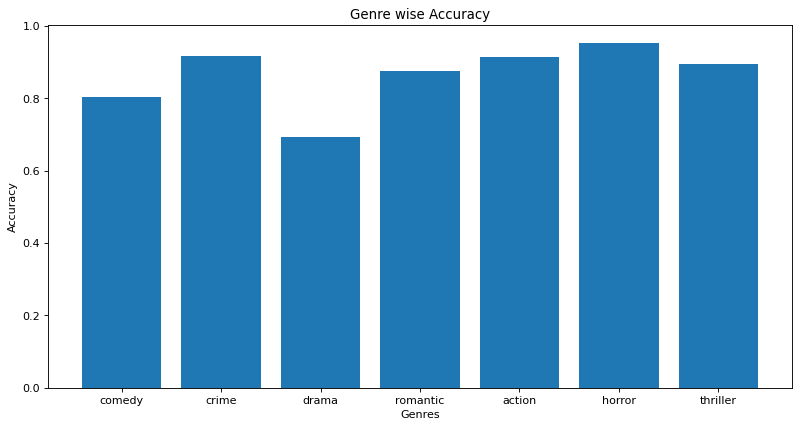

In [147]:
figure(figsize=(12, 6), dpi=80)
plt.bar(cleaned_ohe.columns[1:-1],  all_accuracy)
plt.xlabel("Genres")
plt.title("Genre wise Accuracy")
plt.ylabel("Accuracy")

In [94]:
total = cleaned_ohe[cleaned_ohe.columns[1]]
for i in cleaned_ohe.columns[2:]:
    total += cleaned_ohe[i]

In [96]:
cleaned_ohe["total"] = total

### Drama

In [106]:
#Drama Overlap

1- (len(cleaned_ohe[cleaned_ohe["drama"]==1]) - len(cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["total"]>1]))/len(cleaned_ohe[cleaned_ohe["drama"]==1])

<ipython-input-106-7d8fae6a7828>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  1- (len(cleaned_ohe[cleaned_ohe["drama"]==1]) - len(cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["total"]>1]))/len(cleaned_ohe[cleaned_ohe["drama"]==1])


0.24976338205910187

In [116]:
drama_overlap = []
for i in cleaned_ohe.columns[1:-1]:
    if i != "drama":
        drama_overlap.append(sum(cleaned_ohe[cleaned_ohe["drama"]==1][i]))

In [118]:
cleaned_ohe.columns

Index(['Plot', 'comedy', 'crime', 'drama', 'romantic', 'action', 'horror',
       'thriller', 'total'],
      dtype='object')

Text(0, 0.5, 'Common Classes Count')

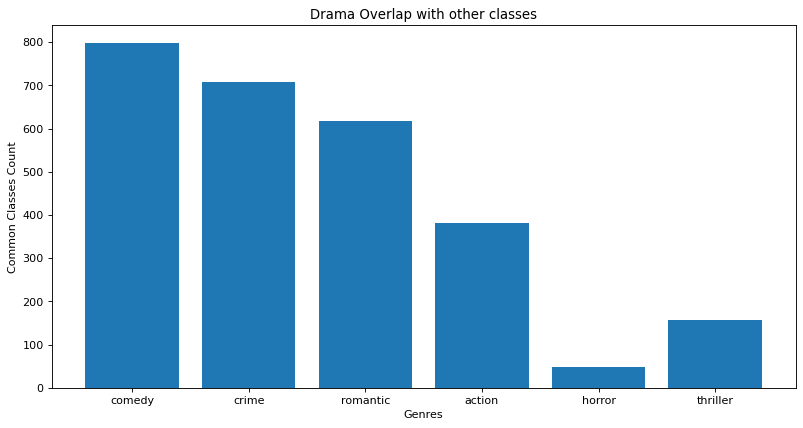

In [120]:
figure(figsize=(12, 6), dpi=80)
plt.bar([ 'comedy', 'crime',  'romantic', 'action', 'horror',
       'thriller' ],  drama_overlap)
plt.xlabel("Genres")
plt.title("Drama Overlap with other classes")
plt.ylabel("Common Classes Count")

In [151]:
for i in range(0, 20):
    plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
    print(plot, "\n--------")
    print(get_genres(plot))
    print("===========================")

<ipython-input-151-815b42b5a938>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-151-815b42b5a938>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-p

Pilot Barry Eldon (Ralph Bellamy) is the owner of Independent Transcontinental Lines whose airline is in direct competition with Martin Drewen (Robert Middlemass), owner of Consolidated Airlines. With Renee Dupont (Tala Birell), a singer at a nightclub owned by Victor Arnold (Douglas Dumbrille), he believes that his airline's air mail routes will ensure success against his rival.
Arnold decides to ally himself with Drewen who has hired German inventor Shulter (Edward Van Sloan), the inventor of a death ray projector. With this device, they bring down three of Eldon's aircraft. Determined to set a new transcontinental record with Wiley Post flying the racer, Eldon has the help of his girlfriend to eventually expose his rivals and destroy their secret headquarters. A new contract in Washington awaits.[3] 
--------
['drama', 'action']
Two newsreel cameramen (John Wayne, Don Barclay) are sent to photograph a bandit sheik in the desert. 
--------
['drama']
A telephone operator covering for 

['drama', 'action']
A slaughterhouse process follows the unloading of cattle to the making of sausages. A wristwatch and a shoe appear on a conveyor line, making it clear that a human cadaver is processed among the cattle. A woman operating the sausage machine is interrupted by "Weenie", who has timed the machine using his watch. He wraps up a string of sausages, then marks the package with an address in Chicago.
Weenie is the brother of "Mary Ann", the crooked operator of the slaughterhouse in Kansas City, Kansas. The particular sausages that Weenie was wrapping were made from the remains of an enforcer from the Chicago Irish Mob sent to Kansas City to collect $500,000 from Mary Ann.
After the head of the Irish Mob in Chicago receives the package, he contacts Nick Devlin, an enforcer with whom he has worked previously, to go to Kansas City to collect the debt. He tells Devlin about the sausages and that another enforcer sent to Kansas City was found floating in the Missouri River.
Dev

<ipython-input-151-815b42b5a938>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-151-815b42b5a938>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-p

['crime', 'drama']
An explosive situation erupts when a mob war thrusts a yakuza, an ex-cop, and his adolescent daughter into a deadly, no-win situation. Booted in disgrace from the L.A. police force Bob Malone suffers a seemingly endless unlucky streak. Matters don't improve when a robbery led by a crazed criminal transpires at the bank where Malone is filling out foreclosure papers. Witnessing the crime, something inside Malone snaps and he single-handedly wipes out most of the robber gang. Unfortunately, the ringleader escapes and Malone ends up jailed by his corrupt former colleague Lt. Tony Dussecq. At the same time, two Japanese yakuza arrive in L.A. to deliver a special message to L.A.'s most prominent Mafia don. The yakuza are in a restaurant when the bank robber (wearing a vest covered with explosives) bursts in and threatens to blow the place up. One of the Japanese, Koji, intervenes in an explosive sequence. He too ends up at the police station just as Malone's feisty teen d

<ipython-input-151-815b42b5a938>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-151-815b42b5a938>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-p

['thriller']
Upon leaving prison, "Driver" breaks into a run until he retrieves his 1970 Chevrolet Chevelle. He drives to an office in Bakersfield, California and kills a man. Driver visits the man who gave him the car and gun and forces him to give him a list of names. Meanwhile, Driver is tracked by detective Cicero and "Cop", a detective on the verge of retirement whose life is off track due to a debilitating heroin addiction. Cicero gets a break in the case when she recognizes Driver on video. Later, a nameless hitman, "Killer", is hired to kill Driver. Killer promises his girlfriend Lily it is his last job.
Driver heads to the second name on his list, an old man who films his own personal snuff films. He is in the middle of filming a sexual assault when Driver busts in the door and shoots him dead. Killer initiates a gun fight in the hallway, but Driver escapes. This affects Killer philosophically, who proposes to his girlfriend and takes the case personally. Cop and Detective are

/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-151-815b42b5a938>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["drama"]==1][cleaned_ohe["action"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` t

### Comedy

In [139]:
#Comedy Overlap

1- (len(cleaned_ohe[cleaned_ohe["comedy"]==1]) - len(cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["total"]>1]))/len(cleaned_ohe[cleaned_ohe["comedy"]==1])

<ipython-input-139-dcf22df36c1a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  1- (len(cleaned_ohe[cleaned_ohe["comedy"]==1]) - len(cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["total"]>1]))/len(cleaned_ohe[cleaned_ohe["comedy"]==1])


0.2815854665565648

In [123]:
comedy_overlap = []
for i in cleaned_ohe.columns[1:-1]:
    if i != "comedy":
        comedy_overlap.append(sum(cleaned_ohe[cleaned_ohe["comedy"]==1][i]))

In [126]:
comedy_overlap

[141, 799, 826, 288, 154, 61]

In [118]:
cleaned_ohe.columns

Index(['Plot', 'comedy', 'crime', 'drama', 'romantic', 'action', 'horror',
       'thriller', 'total'],
      dtype='object')

Text(0, 0.5, 'Common Classes Count')

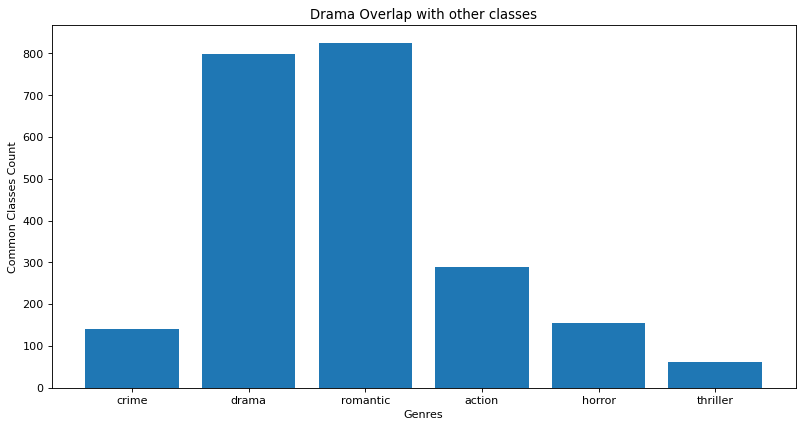

In [127]:
figure(figsize=(12, 6), dpi=80)
plt.bar([ 'crime', 'drama', 'romantic', 'action', 'horror',
       'thriller' ],  comedy_overlap)
plt.xlabel("Genres")
plt.title("Drama Overlap with other classes")
plt.ylabel("Common Classes Count")

In [145]:
for i in range(0, 20):
    plot = cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["romantic"]==1]["Plot"].iloc[i]
    print(plot, "\n--------")
    print(get_genres(plot))
    print("===========================")

<ipython-input-145-b47378d18b9c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["romantic"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-145-b47378d18b9c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["romantic"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/

As described in a film magazine,[3] a forest ranger known only as Headin' South (Fairbanks) goes forth in search of Spanish Joe (Campeau), a Mexican responsible for most of the treachery and outlawry along the U.S.-Mexican boarder. Headin' South gains quite a reputation as he goes along and finally believes himself worthy of joining Joe's band. in a whirlwind finish in which Joe is captured, Headin' South meets one of Joe's near victims (MacDonald) and falls in love with her. 
--------
['comdey', 'romantic']
As described in a film magazine,[3] because of his ability to fix things Dick Remington (Fairbanks) becomes known as "Mr. Fix-It" and enters the aristocratic home of the Burroughs as their nephew. Before long he has melted the stone hearts of three aunts and one uncle and won the heart of Mary McCullough (Hawley) in addition to setting aright the affairs of pretty Georgiana Burroughs (MacDonald) and Olive Van Tassell (Landis). 
--------
['comdey', 'romantic']
As described in a film

/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-145-b47378d18b9c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["romantic"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'

['drama']
King Serge IV of Molvania (Menjou) comes to a small American town, and falls in love with one of its residents, Mary Young (Love).[3][4] 
--------
['comdey', 'romantic']
Ann Barton (Laura La Plante), a girl from a once-wealthy family, must make a living by clerking in a cigar store. There she meets and falls in love with James McDonald (Pat O'Malley), a cigar salesman. She is then adopted by Margaret Wyndham (Hedda Hopper), her rich and aristocratic aunt, who disapproves of James due to his crude manners. Wishing to break up the two, Aunt Margaret sends Ann away to finishing school. In response, Ann acts out publicly and embarrasses her aunt. In the meantime, James learns how to be a proper gentleman and wins her back through having learned good manners and a more dignified bearing. 
--------
['drama']
Kiki (Norma Talmadge) ekes out a living selling newspapers on the streets of Paris. When she learns that a chorus girl has been fired from the Folies Barbes revue managed by Vi

<ipython-input-145-b47378d18b9c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["romantic"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-145-b47378d18b9c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot = cleaned_ohe[cleaned_ohe["comedy"]==1][cleaned_ohe["romantic"]==1]["Plot"].iloc[i]
/home/development/kishan/.local/lib/python3.8/

Hula Calhoun (Clara Bow) is the daughter of a Hawaiian planter, Bill Calhoun (Albert Gran). She follows the advice of her uncle Edwin (Agostino Borgato), and follows a simple and natural life, far from social conventions of her family and is considered a "wild child" who wears pants and rides horses.[2]
Courted with adoration by Harry Dehan (Arnold Kent), Hula prefers a young British engineer, Anthony Haldane (Clive Brook), who came to the island to oversee the construction of a dam on her father's property. However, Haldane is already married. At a party, Haldane tries to keep his distance but Hula gets drunk and performs a seductive hula dance for him. She manages to provoke him so much that he promises that he will get a divorce. When his wife, Margaret (Patricia Dupont), appears, Hula makes a deal with one of the foreman to use dynamite to blow up a point on the dam. Thinking that her husband is now ruined, Mrs. Haldane agrees to the divorce, and the two lovers can finally get marr

['comdey']


## Inference

In [16]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

PATH = "saved_model_7.model"
model_loaded = BERTClass()
model_loaded.load_state_dict(torch.load(PATH))
model_loaded.to(device)
model = model_loaded

cuda


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
class infernce_data(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.Plot = dataframe.Plot
        self.max_len = max_len

    def __len__(self):
        return len(self.Plot)

    def __getitem__(self, index):
        Plot = str(self.Plot[index])
        Plot = " ".join(Plot.split())

        inputs = self.tokenizer.encode_plus(
            Plot,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
        }

In [18]:
infer_params = {'batch_size': 1, 'shuffle': True, 'num_workers': 0}

In [19]:
encoding = {
    
    'comedy': 1, 
    'crime': 2, 
    'drama': 3 , 
    'romantic': 4, 
    'action': 5, 
    'horror': 6, 
    'thriller': 7
    
}


decoding = {
    
    1: 'comedy' , 
    2: 'crime', 
    3: 'drama', 
    4: 'romantic', 
    5: 'action', 
    6: 'horror', 
    7: 'thriller'
    
}

In [20]:
def inference(infer_loader):
    
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    
    with torch.no_grad():
        
        for _, data in enumerate(infer_loader, 0):
#             print(data)
            
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
#             targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
            
    
    
    return fin_outputs

In [21]:

def get_genres(plot):
    
    results = []
    inp = pd.DataFrame(columns =["Plot"])

    inp.loc[0] = plot

 

    user_input = infernce_data(inp, tokenizer, MAX_LEN)

    infer_loader = DataLoader(user_input, **infer_params)
    
    outputs = inference(infer_loader)

    outputs = np.array(outputs) >= 0.5

    
    for i in range(len(outputs[0])):

        if outputs[0][i]:
            results.append(decoding[i+1])
            
    return results
            
    

In [22]:
plot = 'While stuck in Los Angeles traffic, aspiring actress Amelia "Mia" Dolan has a moment of road rage directed at Sebastian "Seb" Wilder, a jazz pianist. After a hard day at work, Mia\'s subsequent audition goes awry when the casting director takes a phone call during an emotional scene. That night, her roommates take her to a lavish party in the Hollywood Hills, promising her that someone in the crowd could jump-start her career. After her car is towed, she walks home in disappointment.'
get_genres(plot)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


['drama', 'romantic']

In [108]:
!pip3 install gradio==2.9

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 668 kB 18.8 MB/s eta 0:00:01
  Attempting uninstall: gradio
    Found existing installation: gradio 2.0.0
    Uninstalling gradio-2.0.0:
      Successfully uninstalled gradio-2.0.0


In [23]:
import gradio as gr

In [24]:
demo = gr.Interface(fn=get_genres, inputs="text", outputs="text")
demo.launch(share=True )

Running on local URL:  http://127.0.0.1:7867/
Running on public URL: https://cf0e973b9fbacf6d.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://www.huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fcbf3cc55b0>,
 'http://127.0.0.1:7867/',
 'https://cf0e973b9fbacf6d.gradio.app')

/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [26]:
# def validation_loaded(epoch):
    
#     model.eval()
#     fin_targets=[]
#     fin_outputs=[]
    
#     with torch.no_grad():
#         for _, data in enumerate(testing_loader, 0):
#             ids = data['ids'].to(device, dtype = torch.long)
#             mask = data['mask'].to(device, dtype = torch.long)
#             token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
#             targets = data['targets'].to(device, dtype = torch.float)
#             outputs = model_loaded(ids, mask, token_type_ids)
#             fin_targets.extend(targets.cpu().detach().numpy().tolist())
#             fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    
    
#     return fin_outputs, fin_targets

In [27]:
# for epoch in range(1):
    
#     outputs, targets = validation_loaded(epoch)
    
 
#     outputs = np.array(outputs) >= 0.5
    
#     accuracy = metrics.accuracy_score(targets, outputs)
#     f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
#     f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
#     print(f"Accuracy Score = {accuracy}")
#     print(f"F1 Score (Micro) = {f1_score_micro}")
#     print(f"F1 Score (Macro) = {f1_score_macro}")
    
#     break

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/development/kishan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Accuracy Score = 0.4510599909788002
F1 Score (Micro) = 0.6103643274311673
F1 Score (Macro) = 0.5488676187155636
